In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from subprocess import check_output
print(check_output(["ls", "./data"]).decode("utf8"))


gender_submission.csv
test.csv
train.csv



In [100]:
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")

In [101]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [102]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [103]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [104]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [105]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


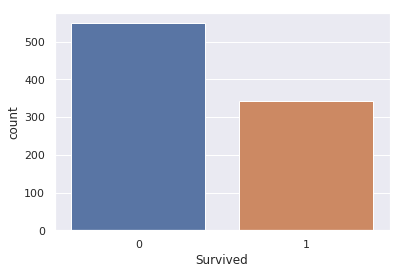

In [106]:
sns.countplot(x='Survived',data = train_df)

In [107]:
train_df.Survived.sum()/train_df.Survived.count()


0.3838383838383838

In [108]:
test_df['Survived'] = 0
test_df[['PassengerId', 'Survived']].to_csv('no_survivors.csv', index=False)

In [109]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [110]:
test_df[["Name","Sex"]]

,Name,Sex
0,"Kelly, Mr. James",male
1,"Wilkes, Mrs. James (Ellen Needs)",female
2,"Myles, Mr. Thomas Francis",male
3,"Wirz, Mr. Albert",male
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female
5,"Svensson, Mr. Johan Cervin",male
6,"Connolly, Miss. Kate",female
7,"Caldwell, Mr. Albert Francis",male
8,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female
9,"Davies, Mr. John Samuel",male


In [111]:
train_df.groupby(['Survived','Sex'])['Survived'].count()


Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

/home/ai2/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


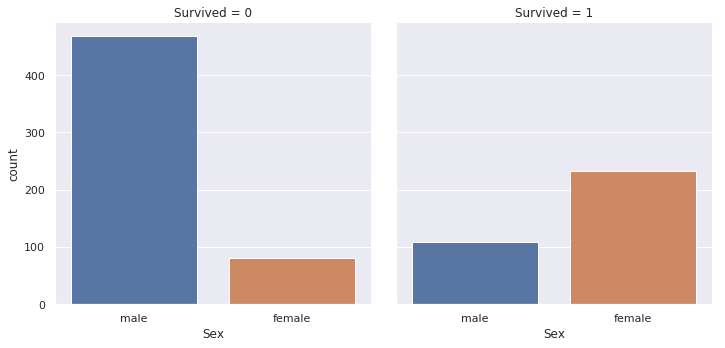

In [112]:
sns.factorplot(x='Sex', col='Survived', kind='count', data=train_df);


In [113]:
print("% of women survived: " , train_df[train_df.Sex == 'female'].Survived.sum()/train_df[train_df.Sex == 'female'].Survived.count())
print("% of men survived:   " , train_df[train_df.Sex == 'male'].Survived.sum()/train_df[train_df.Sex == 'male'].Survived.count())

% of women survived:  0.7420382165605095
% of men survived:    0.18890814558058924


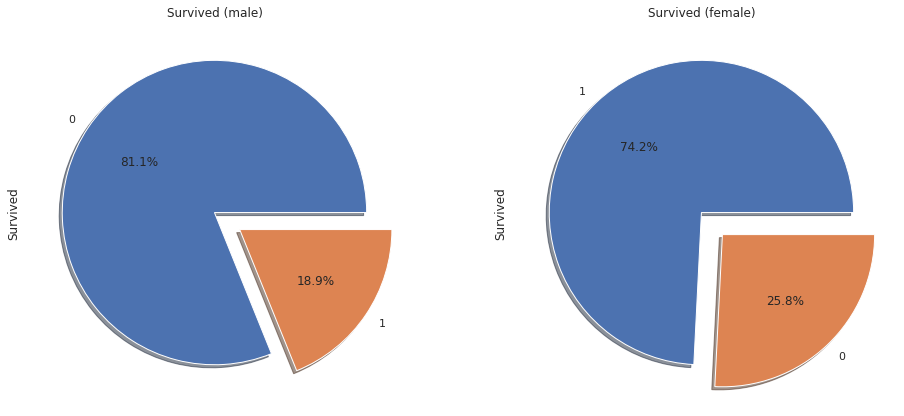

In [114]:
f,ax=plt.subplots(1,2,figsize=(16,7))
train_df['Survived'][train_df['Sex']=='male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
train_df['Survived'][train_df['Sex']=='female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')

plt.show()

In [115]:
test_df['Survived'] = test_df.Sex == 'female'
test_df['Survived'] = test_df.Survived.apply(lambda x: int(x))
test_df[['PassengerId', 'Survived']].to_csv('women_survive.csv', index=False)

In [116]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [117]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [118]:

"""Passenger Class : Survival rate decreases with Pclass
"""


'Passenger Class : Survival rate decreases with Pclass\n'

In [119]:
pd.crosstab(train_df.Pclass, train_df.Survived, margins=True).style.background_gradient(cmap='autumn_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [120]:
train_df.groupby(['Survived','Embarked'])['Survived'].count()


Survived  Embarked
0         C            75
          Q            47
          S           427
1         C            93
          Q            30
          S           217
Name: Survived, dtype: int64

In [121]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [122]:
def per(cls):
    a = train_df['Survived'][train_df.Pclass == cls]
    rate = a.sum()/a.count()
    return rate

In [123]:
print("Survival rate for Pclass = 1 :",per(1))
print("Survival rate for Pclass = 2 :",per(2))
print("Survival rate for Pclass = 3 :",per(3))

Survival rate for Pclass = 1 : 0.6296296296296297
Survival rate for Pclass = 2 : 0.47282608695652173
Survival rate for Pclass = 3 : 0.24236252545824846


/home/ai2/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


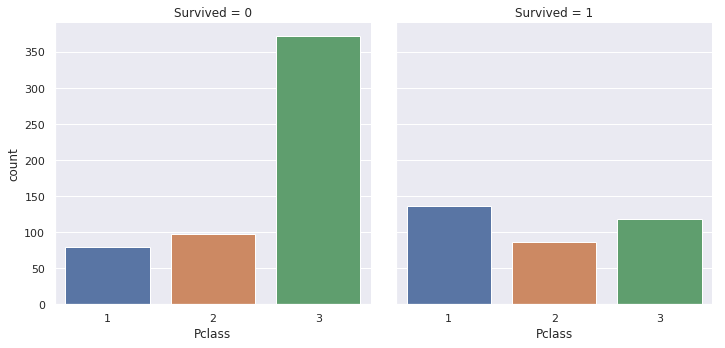

In [124]:
sns.factorplot(x='Pclass', col='Survived', kind='count', data=train_df);


/home/ai2/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


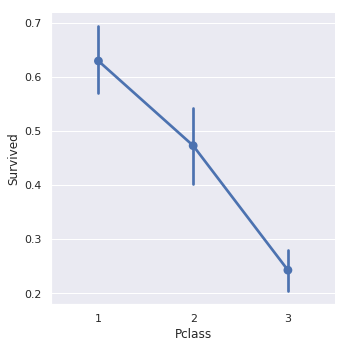

In [125]:
sns.factorplot('Pclass','Survived', kind='point', data=train_df);


In [126]:
"""Passenger Class and Sex :

Almost all women in Pclass 1 and 2 survived and nearly all men in Pclass 2 and 3 died
"""

'Passenger Class and Sex :\n\nAlmost all women in Pclass 1 and 2 survived and nearly all men in Pclass 2 and 3 died\n'

In [127]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [128]:
pd.crosstab([train_df.Sex, train_df.Survived], train_df.Pclass, margins=True).style.background_gradient(cmap='autumn_r')

/home/ai2/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


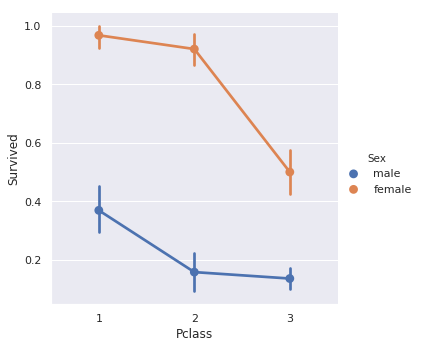

In [129]:
sns.factorplot('Pclass','Survived',hue='Sex', kind='point', data=train_df);


In [130]:
"""
Passenger Class and Sex :

Almost all women in Pclass 1 and 2 survived and nearly all men in Pclass 2 and 3 die
"""

'\nPassenger Class and Sex :\n\nAlmost all women in Pclass 1 and 2 survived and nearly all men in Pclass 2 and 3 die\n'

In [131]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [132]:
pd.crosstab([train_df.Sex, train_df.Survived], train_df.Pclass, margins=True).style.background_gradient(cmap='autumn_r')

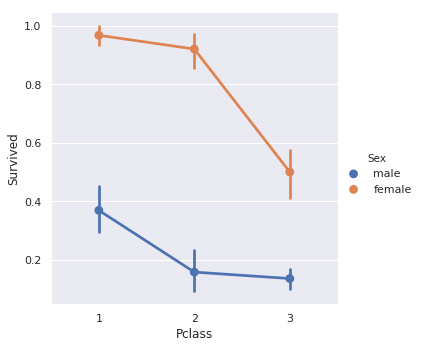

In [133]:
sns.catplot('Pclass','Survived',hue='Sex', kind='point', data=train_df);


In [134]:
"""Embarked : Survival rate lowest for S and highest for C

"""

'Embarked : Survival rate lowest for S and highest for C\n\n'

In [135]:
pd.crosstab([train_df.Embarked, train_df.Survived], train_df.Sex, margins=True).style.background_gradient(cmap='autumn_r')

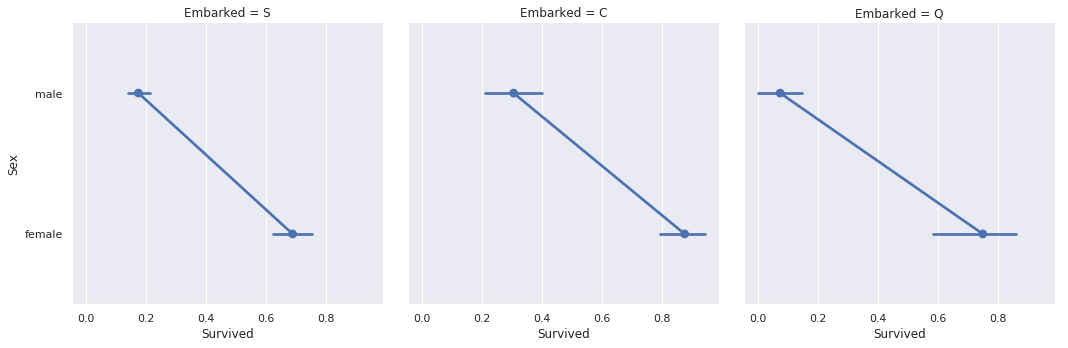

In [136]:
sns.catplot('Survived','Sex',col = 'Embarked', kind='point', data=train_df);


In [137]:
pd.crosstab([train_df.Survived], [train_df.Sex, train_df.Pclass, train_df.Embarked], margins=True).style.background_gradient(cmap='autumn_r')

In [138]:
"""
third model : based on PClass, Sex and Embarked , submission : 0.779 accuracy


"""

'\nthird model : based on PClass, Sex and Embarked , submission : 0.779 accuracy\n\n\n'

In [139]:
# model 3
test_df['Survived'] = 0
# all women survived
test_df.loc[ (test_df.Sex == 'female'), 'Survived'] = 1
# except for those in Pclass 3 and embarked in S
test_df.loc[ (test_df.Sex == 'female') & (test_df.Pclass == 3) & (test_df.Embarked == 'S') , 'Survived'] = 0
test_df[['PassengerId', 'Survived']].to_csv('embarked_pclass_sex.csv', index=False)




In [140]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [141]:
""" Age: continuous numerical to 8 bins
"""

'Age: continuous numerical to 8 bins\n'

In [149]:
for df in [train_df, test_df]:
    df['Age_bin']=np.nan
    for i in range(8,0,-1):
        df.loc[ df['Age'] <= i*10, 'Age_bin'] = i

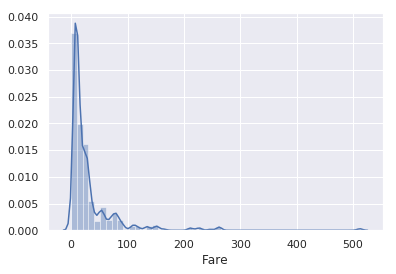

In [151]:
sns.distplot(train_df['Fare']);


In [152]:
for df in [train_df, test_df]:
    df['Fare_bin']=np.nan
    for i in range(12,0,-1):
        df.loc[ df['Fare'] <= i*50, 'Fare_bin'] = i

In [156]:
test_df[['PassengerId', 'Survived']].to_csv('model_4.csv', index=False)


In [157]:
test_df.drop(['Survived'],axis=1,inplace=True)


In [154]:
"""Data wrangling
building two new dataframes df_train_ml and df_test_ml
these will have only ordinal features and no missing values so they can be used for ML algorithms
converting categorical to numerical by pd.get_dummies
dropping all features that seem to be not useful for prediction
Then use the Standard scaler and apply train/test split
"""

'Data wrangling\nbuilding two new dataframes df_train_ml and df_test_ml\nthese will have only ordinal features and no missing values so they can be used for ML algorithms\nconverting categorical to numerical by pd.get_dummies\ndropping all features that seem to be not useful for prediction\nThen use the Standard scaler and apply train/test split\n'

In [193]:
df_train_ml = train_df.copy()
df_test_ml = test_df.copy()

In [194]:
"""pandas get_dummies for categorical features
"""

'pandas get_dummies for categorical features\n'

In [195]:
df_train_ml = pd.get_dummies(df_train_ml, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
df_train_ml.drop(['PassengerId','Name','Ticket', 'Cabin', 'Age_bin', 'Fare_bin'],axis=1,inplace=True)
df_train_ml.dropna(inplace=True)

In [196]:
passenger_id = df_test_ml['PassengerId']
df_test_ml = pd.get_dummies(df_test_ml, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
df_test_ml.drop(['PassengerId','Name','Ticket', 'Cabin', 'Age_bin', 'Fare_bin'],axis=1,inplace=True)


In [208]:
df_train_ml.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [204]:
df_test_ml.head()

,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,34.5,0,0,7.8292,1,1,0,0,1
1,47.0,1,0,7.0000,0,0,1,0,1
2,62.0,0,0,9.6875,1,1,0,1,0
3,27.0,0,0,8.6625,1,0,1,0,1
4,22.0,1,1,12.2875,0,0,1,0,1


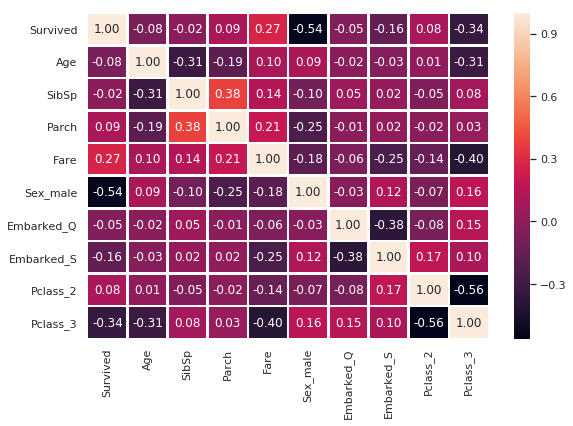

In [206]:
"""Correlation Matrix
"""
corr = df_train_ml.corr()

f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()

In [207]:
"""
Survived and Fare positively correlated, Survived and Sex_male negatively correlated.
Also, Survived and Pclass_3 negatively correlated. SibSp and Parch correlated"""

"""
sklearn StandardScaler
"""

'\nsklearn StandardScaler\n'

In [209]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# for df_train_ml
scaler.fit(df_train_ml.drop('Survived',axis=1))
# scaled_features = scaler.transform(df_train_ml.drop('Survived',axis=1))
# df_train_ml_sc = pd.DataFrame(scaled_features, columns=df_train_ml.columns[:-1])

# for df_test_ml
# df_test_ml.fillna(df_test_ml.mean(), inplace=True)
# scaler.fit(df_test_ml)
# # scaled_features = scaler.transform(df_test_ml)
# df_test_ml_sc = pd.DataFrame(scaled_features, columns=df_test_ml.columns)

/home/ai2/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [210]:
df_train_ml.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1
